In [1]:
import numpy as np
import pandas as pd
import math

from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

# Importing data and configuring the model

First, it is necessary to import the `train_test_df`, to obtain the feature and target (TOC) variables. 

In this part, the `model` is defined and configured according to the 

The `train_test_df` was created using the four steps shown in the [Data_preparation](https://github.com/frbione/bione2024/blob/main/notebooks/Data_preparation.ipynb) notebook of this repository.

The steps applyed are:

1. Import the `train_test_df`, to obtain the feature and target (TOC) variables;
2. Perform data imputation, using the `KNNImputer`;
3. Define the XGBoost `model` (tuned parameters).

After running this first part. You can run any desired section below to generate the respective plots. 

In [2]:
# Importing the dataframe.
df = pd.read_csv('../data/train_test_df.csv')   

# Defining feature and target variables
X = df.drop(['TOC','TOC_DlogR'], axis=1)
y = df['TOC']


# Performing data imputation using KNN
n_neighbors = 361
imputer = KNNImputer(n_neighbors=n_neighbors, weights='distance')

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)


# Defining the XGBoost model parameters
n_estimators = 315
max_depth = 28
min_child_weight = 13
eta = 0.025
subsample = 0.991
colsample_bytree = 0.873
gamma = 0.202
reg_alpha = 0.0
reg_lambda = 9.636

booster = 'gbtree'
eval_metric = 'rmse'


model = XGBRegressor(booster=booster, 
                     n_estimators=n_estimators, 
                     max_depth=max_depth, 
                     min_child_weight=min_child_weight, 
                     eta=eta, 
                     subsample=subsample, 
                     colsample_bytree=colsample_bytree, 
                     gamma=gamma, 
                     reg_alpha=reg_alpha, 
                     reg_lambda=reg_lambda, 
                     eval_metric=eval_metric)

In [3]:
df.describe()

,WELL,LAT,LON,DEPT,CALI,DT,NPHI,RHOB,RESD,GR,TOC,CLUSTER,TOC_DlogR
count,6353.000000,6353.000000,6353.000000,6353.000000,4764.000000,5721.000000,2749.000000,3977.000000,6162.000000,6079.000000,6353.000000,6353.000000,4355.000000
mean,54.934047,-19.461842,-39.683691,2543.537208,10.340960,91.881201,21.583627,2.457446,5.404103,100.217837,1.364890,28.999528,0.649156
std,37.044988,0.493014,0.141947,1196.617966,2.039013,21.014941,12.061177,0.159578,16.542122,34.983795,1.020858,19.114171,1.015194
min,1.000000,-20.952024,-39.888090,500.000000,0.605200,8.003250,0.000000,1.816010,0.202970,20.307090,0.030000,1.000000,0.000000
25%,23.000000,-19.637620,-39.795700,1634.900000,8.837000,76.741790,12.657750,2.352270,1.314582,77.695370,0.790000,12.000000,0.000000
50%,44.000000,-19.357120,-39.739680,2241.000000,9.858500,90.936800,22.030040,2.474220,1.937040,98.861840,1.193000,30.000000,0.185246
75%,85.000000,-19.137220,-39.510580,3200.900000,11.841520,105.088000,31.452990,2.573090,4.105125,120.958400,1.630000,43.000000,1.024411
max,130.000000,-18.286320,-39.316733,6404.900000,16.000000,419.571600,44.816600,2.976900,369.927700,282.875000,10.250000,64.000000,27.150019


# Correlation matrix

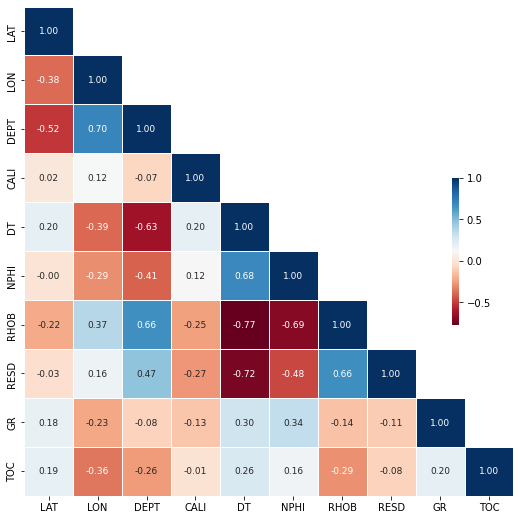

In [4]:
# Creating the correlation matrix for the dataframe by the Spearman method
# The 'TOC_DlogR' column is temporarily removed, because it is not meant to be one of the features
corr = df.drop(['TOC_DlogR','WELL','CLUSTER'], axis=1).corr(method='spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool),k=1)

# Plotting the figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='RdBu', cbar=True, square=True, fmt='.2f', 
            annot=True, annot_kws={'size':9}, cbar_kws={"shrink": .3,"pad":-0.1}, linewidths=.5)

plt.savefig(r"../figures/correlation_matrix.png", transparent=True, bbox_inches='tight', pad_inches=0)

# Results comparison
### Predicted TOC vs. measured TOC

The main steps to generate this figure are:
1. Defining the number of splits and binning the target accordingly. This step is necessary to "convert" TOC (continuous variable) to binned classes, prior to applying the stratified K-Fold split;
2. Then, the figure is generated by iterating over each fold, extracting metrics and plotting them.

D:\Projetos\Python Projects\ml_pr3\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fold number 1 : R² = 0.697
Fold number 2 : R² = 0.728
Fold number 3 : R² = 0.689
Fold number 4 : R² = 0.756
Fold number 5 : R² = 0.716
Fold number 6 : R² = 0.7
Fold number 7 : R² = 0.692
Fold number 8 : R² = 0.707
Fold number 9 : R² = 0.697
Fold number 10 : R² = 0.704

Average R² =  0.709
Average RMSE =  0.55
Average MAE =  0.301

Maximum R² =  0.756
Maximum RMSE =  0.584
Maximum MAE =  0.317

Minimum R² =  0.689
Minimum RMSE =  0.5
Minimum MAE =  0.273
R² of the training set =  0.93
RMSE of the training set =  0.273
MAE of the training set =  0.156


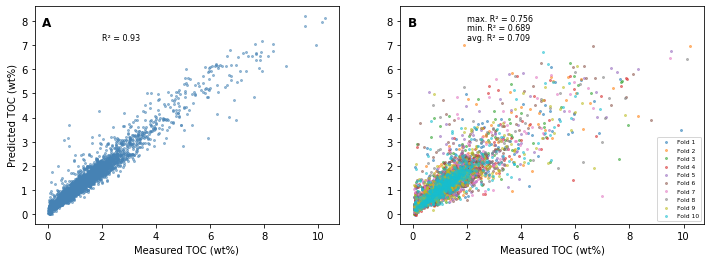

In [5]:
n_splits = 10
num_bins = math.floor(len(df) / n_splits)
bins_on = df["TOC"]
qc = pd.cut(bins_on.tolist(), num_bins)
df['target_bins'] = qc.codes
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)

fold_num = 0
r2_scores = []
rmse_scores = []
mae_scores = []

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 4))

for train_index, test_index in skf.split(X, df['target_bins']):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    r2_score = metrics.r2_score(y_test, test_data_prediction)
    rmse_score = metrics.mean_squared_error(y_test, test_data_prediction, squared=False)
    mae_score = metrics.mean_absolute_error(y_test, test_data_prediction)
    
      
    r2_scores.append(np.round(r2_score, 3))
    rmse_scores.append(np.round(rmse_score, 3))
    mae_scores.append(np.round(mae_score, 3))
    
    fold_num += 1
    print('Fold number', fold_num,': R² =', np.round(r2_score, 3))  
        
    ax2.scatter(y_test, test_data_prediction, label=f"Fold {fold_num}", alpha=0.5, s=4)
    
    
avg_r2 = sum(r2_scores) / len(r2_scores)
avg_rmse = sum(rmse_scores) / len(rmse_scores)
avg_mae = sum(mae_scores) / len(mae_scores)

print('\nAverage R² = ', np.round(avg_r2, 3))
print('Average RMSE = ', np.round(avg_rmse, 3))
print('Average MAE = ', np.round(avg_mae, 3))

print('\nMaximum R² = ', np.round(max(r2_scores), 3))
print('Maximum RMSE = ', np.round(max(rmse_scores), 3))
print('Maximum MAE = ', np.round(max(mae_scores), 3))

print('\nMinimum R² = ', np.round(min(r2_scores), 3))
print('Minimum RMSE = ', np.round(min(rmse_scores), 3))
print('Minimum MAE = ', np.round(min(mae_scores), 3))

train_data_prediction = model.predict(X_train)

ax1.scatter(y_train, train_data_prediction, alpha=0.5, s=4, color='steelblue')

r2_score_train = metrics.r2_score(y_train, train_data_prediction)
r2_score_train = round(r2_score_train, 3)
rmse_score_train = metrics.mean_squared_error(y_train, train_data_prediction, squared=False)
rmse_score_train = round(rmse_score_train, 3)
mae_score_train = metrics.mean_absolute_error(y_train, train_data_prediction)
mae_score_train = round(mae_score_train, 3)

print('R² of the training set = ',r2_score_train)
print('RMSE of the training set = ',rmse_score_train)
print('MAE of the training set = ',mae_score_train)

ax1.annotate(f"R² = {r2_score_train}", (2, 7.2), size=8)
ax1.annotate("A", (-0.2, 7.8), size=12, weight='bold')

ax2.annotate(f"max. R² = {round(max(r2_scores), 3)}", (2, 8), size=8)
ax2.annotate(f"min. R² = {round(min(r2_scores), 3)}", (2, 7.6), size=8)
ax2.annotate(f"avg. R² = {round(avg_r2, 3)}", (2, 7.2), size=8)
ax2.annotate("B", (-0.2, 7.8), size=12, weight='bold')
ax2.legend(loc='best',fontsize="6", markerscale=1)

ax1.set_ylabel("Predicted TOC (wt%)")
ax1.set_xlabel("Measured TOC (wt%)")
ax2.set_xlabel("Measured TOC (wt%)")

ax2.set_ylim(ax1.get_ylim())


plt.savefig(r"../figures/predicted_vs_target.png", transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)
plt.show()

# Residual error vs. measured TOC

D:\Projetos\Python Projects\ml_pr3\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fold number 1 : Data inside the ± 25% error range = 69.34 %
Fold number 2 : Data inside the ± 25% error range = 68.553 %
Fold number 3 : Data inside the ± 25% error range = 72.013 %
Fold number 4 : Data inside the ± 25% error range = 71.969 %
Fold number 5 : Data inside the ± 25% error range = 68.504 %
Fold number 6 : Data inside the ± 25% error range = 69.921 %
Fold number 7 : Data inside the ± 25% error range = 69.921 %
Fold number 8 : Data inside the ± 25% error range = 69.449 %
Fold number 9 : Data inside the ± 25% error range = 68.976 %
Fold number 10 : Data inside the ± 25% error range = 69.449 %

Average data inside the ± 25% error range 69.809 %
Maximum data inside the ± 25% error range 72.013 %


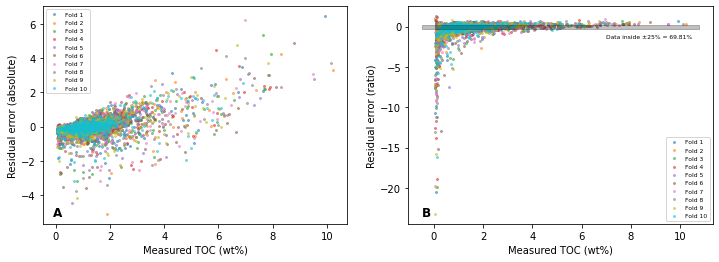

In [6]:
errors_df = pd.DataFrame()

n_splits = 10
num_bins = math.floor(len(df) / n_splits)
bins_on = df["TOC"]
qc = pd.cut(bins_on.tolist(), num_bins)
df['target_bins'] = qc.codes
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 4))

fold_num = 0
residuals_25 = []

#for train_index, test_index in skf.split(X, y):
for train_index, test_index in skf.split(X, df['target_bins']):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)

    
    fold_num += 1
    
    percentual_residual_error = (y_test - test_data_prediction) / y_test            
    ranges = [-.25,0,.25]
    low_residuals = percentual_residual_error.groupby(pd.cut(percentual_residual_error, ranges)).count().sum()
    low_residuals_percentage = 100 * low_residuals / percentual_residual_error.count() 
    residuals_25.append(low_residuals_percentage) 
    
    residual_error = y_test - test_data_prediction
    errors_df[f'y_test_{fold_num}'] = y_test
    errors_df[f'y_residuals_{fold_num}'] = percentual_residual_error
    ax1.scatter(y_test, residual_error, label=f"Fold {fold_num}", alpha=0.5, s=4)

    
    print('Fold number', fold_num, ': Data inside the ± 25% error range =', np.round(low_residuals_percentage, 3),'%')

    ax2.scatter(y_test, percentual_residual_error, label=f"Fold {fold_num}", alpha=0.5, s=4)


avg_residuals_25 = sum(residuals_25) / len(residuals_25)


print('\nAverage data inside the ± 25% error range', np.round(avg_residuals_25, 3),'%')

print('Maximum data inside the ± 25% error range', np.round(max(residuals_25), 3),'%')


ax1.set_xlabel("Measured TOC (wt%)")
ax1.set_ylabel("Residual error (absolute)")
ax1.legend(loc='best',fontsize="6", markerscale=1)
ax1.annotate("A", (-0.1, -5.2), size=12, weight='bold')

ax2.set_xlabel("Measured TOC (wt%)")
ax2.set_ylabel("Residual error (ratio)")
ax2.legend(loc='lower right',fontsize="6", markerscale=1)
ax2.annotate("B", (-0.5, -23.5), size=12, weight='bold')
ax2.annotate(f"Data inside ±25% = {round(avg_residuals_25, 2)}%", (7, -1.5), size=6)

ax2.fill_between(x=plt.gca().get_xlim(), y1=.25, y2=-.25, color='black', alpha=.25)

plt.savefig(r"../figures/residual_errors.png", transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)

plt.show()

# ΔlogR TOC vs. Measured TOC

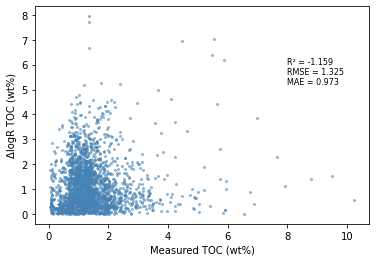

In [7]:
#Visualizing the actual TOC and predicted TOC on test data set

toc_cols = ['TOC','TOC_DlogR']

df_ = df[toc_cols].dropna()

#Filtering TOC_DlogR

df_.drop(df_[df_['TOC_DlogR'] <= 0].index, inplace=True)
df_.drop(df_[df_['TOC_DlogR'] > 10.25].index, inplace=True)


actual_cot = df_['TOC']
toc_dlogr = df_['TOC_DlogR']

plt.scatter(actual_cot, toc_dlogr, alpha=0.5, s=4, color='steelblue')
plt.xlabel("Measured TOC (wt%)")
plt.ylabel("ΔlogR TOC (wt%)")

r2_score = metrics.r2_score(actual_cot, toc_dlogr)
rmse_score = metrics.mean_squared_error(actual_cot, toc_dlogr, squared=False)
mae_score = metrics.mean_absolute_error(actual_cot, toc_dlogr)


plt.annotate(f"R² = {round(r2_score, 3)}", (8, 6), size=8)
plt.annotate(f"RMSE = {round(rmse_score, 3)}", (8, 5.6), size=8)
plt.annotate(f"MAE = {round(mae_score, 3)}", (8, 5.2), size=8)

#plt.title("Actual COT vs. Predicted COT")

#plt.xlim([2, 4])
#plt.ylim([2, 4])
plt.savefig(r"../figures/DlogR_vs_Measured.png", transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)
plt.show()

# Model evaluation

In [8]:
evalset = [(X_train, y_train), (X_test,y_test)]

model.fit(X_train, y_train, eval_set=evalset)
test_data_prediction = model.predict(X_test)
results = model.evals_result()

[0]	validation_0-rmse:1.32004	validation_1-rmse:1.26801
[1]	validation_0-rmse:1.29706	validation_1-rmse:1.24579
[2]	validation_0-rmse:1.27478	validation_1-rmse:1.22468
[3]	validation_0-rmse:1.25368	validation_1-rmse:1.20430
[4]	validation_0-rmse:1.23250	validation_1-rmse:1.18351
[5]	validation_0-rmse:1.21239	validation_1-rmse:1.16391
[6]	validation_0-rmse:1.19238	validation_1-rmse:1.14427
[7]	validation_0-rmse:1.17282	validation_1-rmse:1.12544
[8]	validation_0-rmse:1.15508	validation_1-rmse:1.10897
[9]	validation_0-rmse:1.13636	validation_1-rmse:1.09143
[10]	validation_0-rmse:1.11882	validation_1-rmse:1.07474
[11]	validation_0-rmse:1.10162	validation_1-rmse:1.05853
[12]	validation_0-rmse:1.08489	validation_1-rmse:1.04246
[13]	validation_0-rmse:1.06857	validation_1-rmse:1.02732
[14]	validation_0-rmse:1.05201	validation_1-rmse:1.01195
[15]	validation_0-rmse:1.03603	validation_1-rmse:0.99665
[16]	validation_0-rmse:1.02062	validation_1-rmse:0.98203
[17]	validation_0-rmse:1.00599	validation

[144]	validation_0-rmse:0.39839	validation_1-rmse:0.53343
[145]	validation_0-rmse:0.39699	validation_1-rmse:0.53288
[146]	validation_0-rmse:0.39566	validation_1-rmse:0.53258
[147]	validation_0-rmse:0.39442	validation_1-rmse:0.53229
[148]	validation_0-rmse:0.39320	validation_1-rmse:0.53205
[149]	validation_0-rmse:0.39188	validation_1-rmse:0.53166
[150]	validation_0-rmse:0.39068	validation_1-rmse:0.53149
[151]	validation_0-rmse:0.38950	validation_1-rmse:0.53154
[152]	validation_0-rmse:0.38821	validation_1-rmse:0.53105
[153]	validation_0-rmse:0.38702	validation_1-rmse:0.53098
[154]	validation_0-rmse:0.38579	validation_1-rmse:0.53079
[155]	validation_0-rmse:0.38458	validation_1-rmse:0.53050
[156]	validation_0-rmse:0.38338	validation_1-rmse:0.53051
[157]	validation_0-rmse:0.38228	validation_1-rmse:0.53028
[158]	validation_0-rmse:0.38092	validation_1-rmse:0.53026
[159]	validation_0-rmse:0.37977	validation_1-rmse:0.53000
[160]	validation_0-rmse:0.37860	validation_1-rmse:0.53001
[161]	validati

[286]	validation_0-rmse:0.28493	validation_1-rmse:0.52323
[287]	validation_0-rmse:0.28446	validation_1-rmse:0.52314
[288]	validation_0-rmse:0.28401	validation_1-rmse:0.52315
[289]	validation_0-rmse:0.28364	validation_1-rmse:0.52308
[290]	validation_0-rmse:0.28321	validation_1-rmse:0.52318
[291]	validation_0-rmse:0.28284	validation_1-rmse:0.52315
[292]	validation_0-rmse:0.28242	validation_1-rmse:0.52309
[293]	validation_0-rmse:0.28198	validation_1-rmse:0.52293
[294]	validation_0-rmse:0.28149	validation_1-rmse:0.52279
[295]	validation_0-rmse:0.28113	validation_1-rmse:0.52274
[296]	validation_0-rmse:0.28064	validation_1-rmse:0.52283
[297]	validation_0-rmse:0.28008	validation_1-rmse:0.52293
[298]	validation_0-rmse:0.27960	validation_1-rmse:0.52292
[299]	validation_0-rmse:0.27920	validation_1-rmse:0.52293
[300]	validation_0-rmse:0.27879	validation_1-rmse:0.52306
[301]	validation_0-rmse:0.27837	validation_1-rmse:0.52310
[302]	validation_0-rmse:0.27797	validation_1-rmse:0.52319
[303]	validati

D:\Projetos\Python Projects\ml_pr3\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Running fold number 1 ...
Running fold number 2 ...
Running fold number 3 ...
Running fold number 4 ...
Running fold number 5 ...
Running fold number 6 ...
Running fold number 7 ...
Running fold number 8 ...
Running fold number 9 ...
Running fold number 10 ...


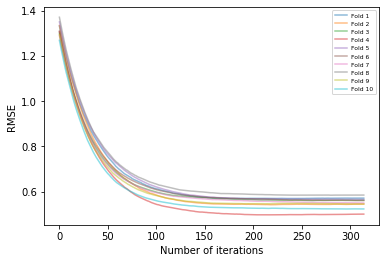

In [9]:
n_splits = 10
num_bins = math.floor(len(df) / n_splits)
bins_on = df["TOC"]
qc = pd.cut(bins_on.tolist(), num_bins)
df['target_bins'] = qc.codes
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)

fold_num = 0
r2_scores = []
rmse_scores = []
mae_scores = []


for train_index, test_index in skf.split(X, df['target_bins']):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    evalset = [(X_train, y_train), (X_test,y_test)]
    
    model.fit(X_train, y_train, eval_set=evalset, verbose=0)
    test_data_prediction = model.predict(X_test)
    results = model.evals_result()
    plt.plot(results['validation_1'][eval_metric], label=f'Fold {fold_num+1}', alpha=0.5)
  
    fold_num += 1
    print('Running fold number', fold_num, '...')
    
#plt.plot(results['validation_0'][eval_metric], label='train', color='steelblue', linewidth=1.5, linestyle='--')
plt.xlabel("Number of iterations")
plt.ylabel("RMSE")
plt.legend(loc='best', fontsize="6", markerscale=0.5)
plt.savefig(r"../figures/RMSE_vs_iterations.png", transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)
plt.show()

# Boxplots and histograms
### Supplementary Figure 1

D:\Projetos\Python Projects\ml_pr3\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Running fold number 1 ...
Running fold number 2 ...
Running fold number 3 ...
Running fold number 4 ...
Running fold number 5 ...
Running fold number 6 ...
Running fold number 7 ...
Running fold number 8 ...
Running fold number 9 ...
Running fold number 10 ...


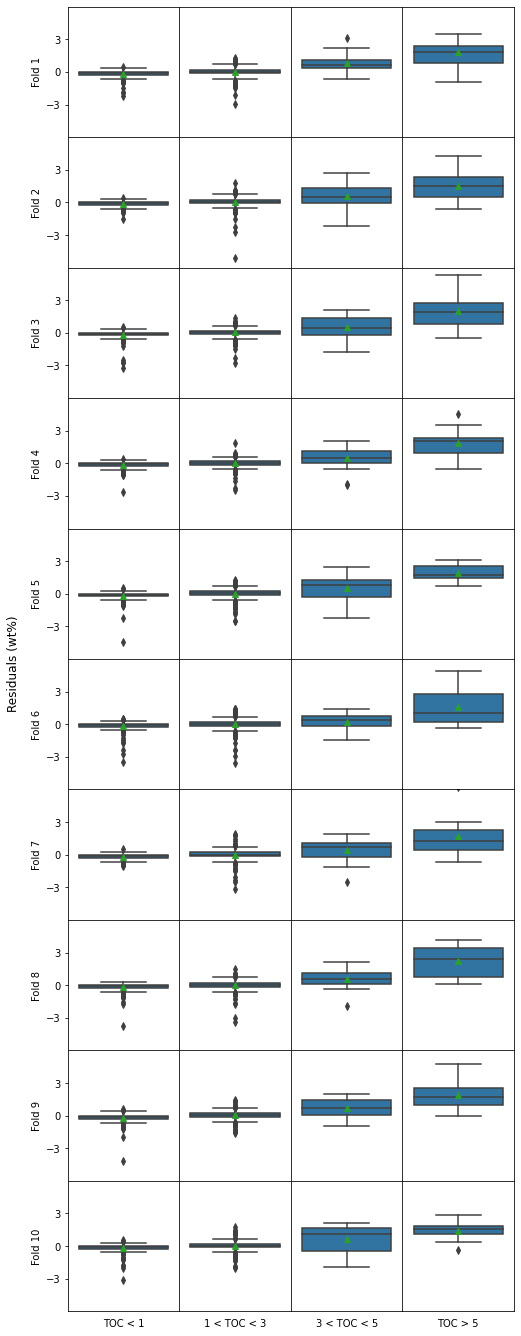

In [10]:
n_splits = 10
num_bins = math.floor(len(df) / n_splits)
bins_on = df["TOC"]
qc = pd.cut(bins_on.tolist(), num_bins)
df['target_bins'] = qc.codes
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)

fold_num = 0
r2_scores = []
rmse_scores = []
mae_scores = []

fig, (axs) = plt.subplots(10, 4, figsize=(8, 24), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)


for train_index, test_index in skf.split(X, df['target_bins']):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    r2_score = metrics.r2_score(y_test, test_data_prediction)
    rmse_score = metrics.mean_squared_error(y_test, test_data_prediction, squared=False)
    mae_score = metrics.mean_absolute_error(y_test, test_data_prediction)
        
    r2_scores.append(r2_score)
    rmse_scores.append(rmse_score)
    mae_scores.append(mae_score)
    
    fold_num += 1
    print('Running fold number', fold_num, '...')
    
    residual_error = y_test - test_data_prediction
    
    residuals_df = pd.DataFrame()
    residuals_df[f'y_test'] = y_test
    residuals_df[f'y_residuals'] = residual_error
    
    x = residuals_df.mask(residuals_df['y_test'] >= 1)  # Removing TOC >= 1
    x2 = residuals_df.mask(residuals_df['y_test'] < 1).mask(residuals_df['y_test'] >= 3)  # Removing TOC < 1 and >= 3
    x3 = residuals_df.mask(residuals_df['y_test'] < 3).mask(residuals_df['y_test'] >= 5)  # Removing TOC <= 3 and >= 5
    x4 = residuals_df.mask(residuals_df['y_test'] < 5) # Removing TOC < 5
    
    sns.boxplot(y=x['y_residuals'], ax=axs[fold_num-1,0], showmeans=True)
    sns.boxplot(y=x2['y_residuals'], ax=axs[fold_num-1,1], showmeans=True)
    sns.boxplot(y=x3['y_residuals'], ax=axs[fold_num-1,2], showmeans=True)
    sns.boxplot(y=x4['y_residuals'], ax=axs[fold_num-1,3], showmeans=True)
    
    axs[fold_num-1,0].set(xlabel=None,ylabel=f'Fold {fold_num}', yticks=[-3,0,3], xticks=[], ylim=(-6,6))
    axs[fold_num-1,1].set(xlabel=None,ylabel=None, yticks=[], xticks=[], ylim=(-6,6))
    axs[fold_num-1,2].set(xlabel=None,ylabel=None, yticks=[], xticks=[], ylim=(-6,6))
    axs[fold_num-1,3].set(xlabel=None,ylabel=None, yticks=[], xticks=[], ylim=(-6,6))

    
axs[9,0].set(xlabel='TOC < 1') 
axs[9,1].set(xlabel='1 < TOC < 3')
axs[9,2].set(xlabel='3 < TOC < 5')
axs[9,3].set(xlabel='TOC > 5')
fig.supylabel('Residuals (wt%)')


plt.savefig(r"../figures/supplementary_figure_1.png", transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)
plt.show()